In [1]:
/*!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!*/
/*                                                                      */
/*To use this script, first you have to sourse the LocalConfig.sh file. */
/* i.e. source HEPTools/LocalConfigDelphes.sh                           */
/*!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!*/

In [2]:
#include <fstream>
#include <cstdlib>
#include <utility>
#include "TMath.h"
#include <ctime> 
#include "Lib.C"

In [3]:
// Get current date/time, format is YYYY-MM-DD.HH:mm:ss
const std::string currentDateTime() {
    time_t     now = time(0);
    struct tm  tstruct;
    char       buf[80];
    tstruct = *localtime(&now);
    // Visit http://en.cppreference.com/w/cpp/chrono/c/strftime
    // for more information about date/time format
    strftime(buf, sizeof(buf), "%Y %m %d.%X", &tstruct);
    //strftime(buf, sizeof(buf), "%Y-%m-%d.%X", &tstruct);
    return buf;
}

In [4]:
//Volverlo una clase con varios tipos de funciones
TH1D * CutAndPlotTRee(TChain &chain, const char * Var, TCut Cut="", TCut Weight="", Int_t fNBins = -1, Double_t fXmin=std::numeric_limits<double>::quiet_NaN(), Double_t fXmax=std::numeric_limits<double>::quiet_NaN(),const char * name = "Name"){
    const char * name1 = "Name";
        
    if(fNBins == -1 || fXmin==std::numeric_limits<double>::quiet_NaN()||fXmax==std::numeric_limits<double>::quiet_NaN()){
        chain.Draw(Form("%s>>myh", Var),Cut*Weight,"goff");//send the histogram to the obget myh

    }else{
        chain.Draw(Form("%s>>myh(%d,%f,%f)", Var,fNBins, fXmin, fXmax),Cut*Weight,"goff");//send the histogram to the obget myh
    }
    
    TH1D * h = (TH1D *)gROOT->FindObject("myh");
    TH1D * h1 = (TH1D *)h->Clone();
    h1->SetName(Form("%s", name));

    return h1;
}

In [5]:
/*Canvas Objet*/
TCanvas c;
gStyle->SetOptStat(0);

In [6]:
//gSystem->Load("/home/camilo/HEPTools/MADGRAPH/MG5_aMC_v2_5_5_Root6/ExRootAnalysis/libExRootAnalysis.so");
gSystem->Load("/home/camilo/HEPTools/MADGRAPH/MG5_aMC_v2_5_5_Root6/Delphes/libDelphes.so");
//If you run sourse DelphesEnv.sh
//gSystem->Load("libDelphes.so");

In [7]:
//gROOT->ProcessLine(".x Lib.C");

In [8]:
std::string dirname ="/home/camilo/cms/Scripts_MadGraph_VLFTEO/Datos/WJets";
std::string ext = ".root";
list_files lista;
auto v=lista.GetFileList(dirname.c_str(),ext.c_str());

In [9]:
TChain chain("Delphes");
TChain chain1("Delphes");
TChain chain2("Delphes");
TChain chain3("Delphes");

//W+jets
for(std::vector<string>::iterator it = v.begin(); it != v.end(); ++it) {
    //std::cout << it->c_str()<<std::endl;
    chain1.Add(it->c_str());
}

chain2.Add("/home/camilo/cms/MC_VLF-Originales/SingleTop/*.root");
chain3.Add("/home/camilo/cms/MC_VLF-Originales/WZ/*.root");
//chain.Add("/home/camilo/cms/MC_VLF-Originales/Signal_BR_Muon25_Tau75_BRFixed/Masses_100_98_Brs_2575_FixedBRs_delphes_events.root");
//chain.Add("/home/camilo/cms/MC_VLF-Originales/Signal_BR_Muon25_Tau75_BRFixed/Masses_100_85_Brs_2575_FixedBRs_delphes_events.root");
//chain.Add("/home/camilo/cms/MC_VLF-Originales/Signal_BR_Muon25_Tau75_BRFixed/Masses_100_95_Brs_2575_FixedBRs_delphes_events.root");
//chain.Add("/home/camilo/cms/MC_VLF-Originales/Signal_BR_Muon25_Tau75_BRFixed/Masses_165_145_Brs_2575_FixedBRs_delphes_events.root");
chain.Add("/home/camilo/cms/MC_VLF-Originales/Signal_BR_Muon25_Tau75_BRFixed/Masses_145_135_Brs_2575_FixedBRs_delphes_events.root");


# -------------------------------------------------------------------
# Variables


__MHT__: Is the missing transverse momentum vector sum which is calculated from the Hadron Calorimeter deposited energy.

__HT__: the transverse momentum scalar sum.

In [10]:
/*Variables names "std::pair <std::string,std::string> Variable ("NameVariable","Latex Labl #");" */
//std::pair <std::string,std::string> Var1 ("sqrt(2*Muon.PT*MissingET.MET*(1-cos((2*TMath::Pi()+Muon.Phi-MissingET.Phi)%(2*TMath::Pi()))))","m_T(#mu,p_{T}^{Miss}) [GeV]");
//std::pair <std::string,std::string> Var1 ("Muon[0].PT","P_{T}(#mu) [GeV]");
//std::pair <std::string,std::string> Var1 ("Jet_size","N(Jet)");
std::pair <std::string,std::string> Var1 ("Jet.[0]PT","p_{T}(Jet) [GeV]");
//std::pair <std::string,std::string> Var1 ("ScalarHT.HT","H_{T}");


# -------------------------------------------------------------------
# Cuts

In [11]:
TCut MonoJetTrigger = "";
TCut cut0     = "" ;
TCut cut1     = "" ;
TCut cut2     = "" ;
TCut cut3     = "" ;
TCut cut4     = "" ;
TCut cut5     = "" ;
TCut AllCuts  = "" ;

In [12]:
MonoJetTrigger="(ScalarHT.HT>110.)&&(MissingET.MET>110.)";
cut0 = "Muon_size==1&&Jet.BTag==0&&Jet_size>0";
cut1 = "sqrt(2*Muon.PT*MissingET.MET*(1-cos((2*TMath::Pi()+Muon.Phi-MissingET.Phi)%(2*TMath::Pi()))))<60";
cut2 = "Muon[0].PT<20";
cut3 = "Jet_size<3";
//cut4 = "Jet[0].PT>50";

//Jose's Cuts
//cut4 = "Muon[0].PT<20&&Jet_size<4&&Jet.PT>20&&Jet_size>0";
//cut5 = "sqrt(2*Muon.PT*MissingET.MET*(1-cos((2*TMath::Pi()+Muon.Phi-MissingET.Phi)%(2*TMath::Pi()))))<40";

## Luminosity

In [13]:
Double_t Lumi = 100;//pb

## Weight
$w=\frac{\mathcal{L}\sigma_{x}}{N_{MC}}$:

In [14]:
Double_t WeightSignal = 0.2039*(1000*Lumi)/chain.GetEntries();//
Double_t WeightBG1 = 3377.37*(1000*Lumi)/chain1.GetEntries();//Peso W+Jets
Double_t WeightBG2 = 288.17*(1000*Lumi)/chain2.GetEntries();//Peso SingleTop
Double_t WeightBG3 = 22.82*(1000*Lumi)/chain3.GetEntries();//Peso WZ

In [15]:
TCut W = std::to_string(WeightSignal).c_str();
TCut W1 = std::to_string(WeightBG1).c_str();
TCut W2 = std::to_string(WeightBG2).c_str();
TCut W3 = std::to_string(WeightBG3).c_str();

In [16]:
std::cout<< "    WSignal: " << W <<std::endl;
std::cout<< "    WBG1   : " << W1 <<std::endl;
std::cout<< "    WBG2   : " << W2 <<std::endl;
std::cout<< "    WBG3   : " << W3 <<std::endl;

    WSignal: 0.360247
    WBG1   : 6725.952921
    WBG2   : 90.333724
    WBG3   : 14.650745


# -------------------------------------------------------------------

In [17]:
/*Wich Cut you want to applied*/
AllCuts  = MonoJetTrigger&&cut0&&cut1&&cut2&&cut3&&cut4&&cut5;

# -------------------------------------------------------------------
# Save Preferences

In [18]:
Bool_t SaveFiles = kFALSE;
//SaveFiles = kTRUE;

In [19]:
std::string PlotName = NameMaker(Var1.second);
std::string CutName = NameMaker((string)AllCuts);
std::string PlotPath = "Plots_PDF/" + NameMaker(CutName);
std::cout<<gSystem->pwd()<<"/"<<PlotPath<<std::endl;

/Storage/cms/Optimization/scripts/Plots_PDF/ScalarHTHTMT110ANDMissingETMETMT110ANDMuon_sizeEQ1ANDJetBTagEQ0ANDJet_sizeMT0ANDsqrt2MuonPTMissingETMET1Minuscos2TMathPiPlusMuonPhiMinusMissingETPhi2TMathPiLT60ANDMuon[0]PTLT20ANDJet_sizeLT3


In [20]:
/*Create the output Folder (If is needed)*/
if (SaveFiles){
    std::string cmdbash = "mkdir -p "+PlotPath;
    const int dir_err =system(cmdbash.c_str());
}

In [21]:
/*Output File*/
std::ofstream outfile;
std::string TextPathName = NameMaker(PlotPath + "/" + PlotName +"_"+ currentDateTime())+ ".txt";

if (SaveFiles){
    outfile.open(TextPathName.c_str());//std::ios_base::app
}

In [22]:
outfile<<std::endl;

outfile<<"=============================================================================================="<<std::endl;
outfile<<std::endl;
outfile<<"*    Cuts Applied: "<< AllCuts <<std::endl;
outfile<<std::endl;
outfile<<std::endl;

In [23]:
outfile<<"=============================================================================================="<<std::endl;
outfile<<"*                                        FILES                                               *"<<std::endl;
outfile<<"=============================================================================================="<<std::endl;

outfile<<"Signal"<<std::endl;

for (int i = 0; i < chain.GetListOfFiles()->GetEntries(); ++i){
    outfile<<(chain.GetListOfFiles()->At(i))->GetTitle()<<std::endl; 
}

outfile<<std::endl<<"Background 1"<<std::endl;

for (int i = 0; i < chain1.GetListOfFiles()->GetEntries(); ++i){
    outfile<<(chain1.GetListOfFiles()->At(i))->GetTitle()<<std::endl; 
}
outfile<<std::endl<<"Background 2"<<std::endl;

for (int i = 0; i < chain2.GetListOfFiles()->GetEntries(); ++i){
    outfile<<(chain2.GetListOfFiles()->At(i))->GetTitle()<<std::endl; 
}
outfile<<std::endl<<"Background 3"<<std::endl;

for (int i = 0; i < chain3.GetListOfFiles()->GetEntries(); ++i){
    outfile<<(chain3.GetListOfFiles()->At(i))->GetTitle()<<std::endl; 
}
outfile<<std::endl;

outfile<<"=============================================================================================="<<std::endl;
outfile<<std::endl;
outfile<<"*    Lumi: "<< Lumi <<"pb"<<std::endl;
outfile<<std::endl;

# Crosscheck

### The two methods to find the entries match

In [24]:
//Root Entries
auto ChainEntries = chain1.GetEntries();
TH1D * h0 = CutAndPlotTRee(chain1,"Event.fUniqueID","","1");//No cuts Weight 1
//Getting the entries from the histogram without weight
auto IntegralEntries = h0->Integral();
if(IntegralEntries == ChainEntries){
    std::cout<<"PASS!!"<<std::endl;
    std::cout<<"IntegralEntries: "<<IntegralEntries<<std::endl; 
    std::cout<<"ChainEntries: "<<ChainEntries<<std::endl;     
}else{
    std::cout<<"!!!FAIL!!"<<std::endl;
    std::cout<<"IntegralEntries: "<<IntegralEntries<<std::endl; 
    std::cout<<"ChainEntries: "<<ChainEntries<<std::endl; 
}

PASS!!
IntegralEntries: 50214
ChainEntries: 50214


### The weight is well applied

In [25]:
//Root Entries
auto ChainEntriesW = chain1.GetEntries();
TH1D * h1 = CutAndPlotTRee(chain1,"Event.fUniqueID","",W1);
//Getting the entries from the histogram without weight
auto IntegralEntriesW = h1->Integral();
auto error1 = TMath::Abs(WeightBG1*ChainEntriesW-IntegralEntriesW)/IntegralEntriesW; 
if(0.001 > error1){
    std::cout<<"PASS!!! Diff: "<< error1<<", is less than 0.01%"<<std::endl;
    std::cout<<"Weight: "<<W1<<std::endl;
    std::cout<<"IntegralEntries: "<<IntegralEntriesW<<std::endl; 
    std::cout<<"ChainEntries: "<<ChainEntriesW<<std::endl;     
}else{
    std::cout<<"!!!FAIL!!! Diff: "<< error1<<", is more than 0.01%"<<std::endl;    
    std::cout<<"Weight: "<<W1<<std::endl;
    std::cout<<"IntegralEntries: "<<IntegralEntriesW<<std::endl; 
    std::cout<<"ChainEntries: "<<ChainEntriesW<<std::endl; 
}

PASS!!! Diff: 0.000501304, is less than 0.01%
Weight: 6725.952921
IntegralEntries: 3.37568e+08
ChainEntries: 50214


### Using a Cut

In [26]:
//Root Entries
auto ChainEntriesWC = chain1.GetEntries("Event.Number>200");
TH1D * h2 = CutAndPlotTRee(chain1,"Event.fUniqueID","Event.Number>200",W1);
//Getting the entries from the histogram without weight
auto IntegralEntriesWC = h2->Integral();
auto error2 = TMath::Abs(WeightBG1*ChainEntriesWC-IntegralEntriesWC)/IntegralEntriesWC; 
if(0.001 > error2){
    std::cout<<"*    PASS!!! Diff   : "<< error2<<", is less than 0.01%"<<std::endl;
    std::cout<<"*    Weight         : "<<W1<<std::endl;
    std::cout<<"*    IntegralEntries: "<<IntegralEntriesWC<<std::endl; 
    std::cout<<"*    ChainEntries   : "<<ChainEntriesWC<<std::endl;  
    //Outputfile
    outfile<<std::endl;

    outfile<<"=============================================================================================="<<std::endl;
    outfile<<"*                                  CROSSCHECKS                                                 "<<std::endl;
    outfile<<"=============================================================================================="<<std::endl;
    outfile<<std::endl;
 
    outfile<<"PASS!!! Diff: "<< error2<<", is less than 0.01%"<<std::endl;
    outfile<<"Weight: "<<W1<<std::endl;
    outfile<<"IntegralEntries: "<<IntegralEntriesWC<<std::endl; 
    outfile<<"ChainEntries: "<<ChainEntriesWC<<std::endl;
}else{
    std::cout<<"!!!FAIL!!! Diff: "<< error2<<", is more than 0.01%"<<std::endl;
    std::cout<<"Weight: "<<W1<<std::endl;
    std::cout<<"IntegralEntries: "<<IntegralEntriesWC<<std::endl; 
    std::cout<<"ChainEntries: "<<ChainEntriesWC<<std::endl; 
    //Outputfile
    outfile<<std::endl;

    outfile<<"=============================================================================================="<<std::endl;
    outfile<<"*                                  CROSSCHECKS                                                 "<<std::endl;
    outfile<<"=============================================================================================="<<std::endl;
    outfile<<std::endl;
    outfile<<std::endl;
    outfile<<"*    !!!FAIL!!! Diff: "<< error2<<", is more than 0.01%"<<std::endl;
    outfile<<"*    Weight          : "<<W1<<std::endl;
    outfile<<"*    IntegralEntries : "<<IntegralEntriesWC<<std::endl; 
    outfile<<"*    ChainEntries    : "<<ChainEntriesWC<<std::endl;
    outfile<<std::endl;
    outfile<<"=============================================================================================="<<std::endl;
    
}

*    PASS!!! Diff   : 0.000475001, is less than 0.01%
*    Weight         : 6725.952921
*    IntegralEntries: 3.15956e+08
*    ChainEntries   : 46998


# End of crosschecks
# -------------------------------------------------------------------

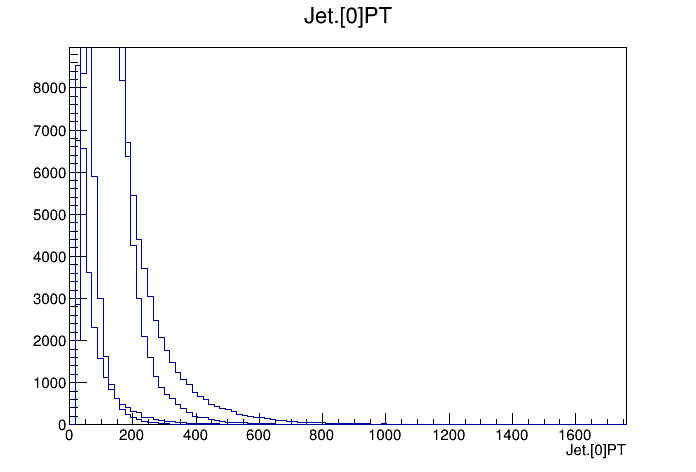

In [27]:
chain.Draw(Var1.first.c_str(),"");
chain1.Draw(Var1.first.c_str(),"","same");
chain2.Draw(Var1.first.c_str(),"","same");
chain3.Draw(Var1.first.c_str(),"","same");
c.Update();
c.Draw()

## Define the limits

In [28]:
Int_t fNBins = 1; 
Float_t fXmin  = 0;
Float_t fXmax  = 10;

if(Var1.second=="P_{T}(#mu) [GeV]"){
    std::cout<<"P_{T}(#mu) [GeV]";
    fNBins = 20; 
    fXmin  = 1;
    fXmax  = 80;
}
if(Var1.second=="N(Jet)"){
    std::cout<<"N(Jet)";
    fNBins = 6; 
    fXmin  = 1;
    fXmax  = 6;
}
if(Var1.second=="H_{T}"){
    std::cout<<"H_{T}";
    fNBins = 13; 
    fXmin  = 110;
    fXmax  = 500;
}
if(Var1.second=="p_{T}(Jet) [GeV]"){
    std::cout<<"p_{T}(Jet) [GeV]";
    fNBins = 19; 
    fXmin  = 20;
    fXmax  = 400;
}
if(Var1.second=="m_T(#mu,p_{T}^{Miss}) [GeV]"){
    std::cout<<"m_T(#mu,p_{T}^{Miss}) [GeV]";
    fNBins = 20; 
    fXmin  = 1;
    fXmax  = 100;
}

p_{T}(Jet) [GeV]

In [29]:
TH1D * SignalTH1D      = CutAndPlotTRee(chain,Var1.first.c_str(),AllCuts,W,fNBins,fXmin,fXmax,"Signal");
TH1D * BackGround1TH1D = CutAndPlotTRee(chain1,Var1.first.c_str(),AllCuts,W1,fNBins,fXmin,fXmax,"WJets");
TH1D * BackGround2TH1D = CutAndPlotTRee(chain2,Var1.first.c_str(),AllCuts,W2,fNBins,fXmin,fXmax,"SingleTop");
TH1D * BackGround3TH1D = CutAndPlotTRee(chain3,Var1.first.c_str(),AllCuts,W3,fNBins,fXmin,fXmax,"WZ");

+ Coloring the plots

In [30]:
SignalTH1D->SetLineColor(4);//Blue
SignalTH1D->SetFillColor(4);
SignalTH1D->SetTitle("");
SignalTH1D->GetYaxis()->SetTitle("Arbitrary Units");
SignalTH1D->GetXaxis()->SetTitle(Var1.second.c_str());

BackGround1TH1D->SetLineColor(2);//Red
BackGround1TH1D->SetFillColor(2);
BackGround1TH1D->SetTitle("");
BackGround1TH1D->GetYaxis()->SetTitle("Arbitrary Units");
BackGround1TH1D->GetXaxis()->SetTitle(Var1.second.c_str());

BackGround2TH1D->SetLineColor(6);//Magenta
BackGround2TH1D->SetFillColor(6);
BackGround2TH1D->SetTitle("");
BackGround2TH1D->GetYaxis()->SetTitle("Arbitrary Units");
BackGround2TH1D->GetXaxis()->SetTitle(Var1.second.c_str());

BackGround3TH1D->SetLineColor(8);//Green
BackGround3TH1D->SetFillColor(8);
BackGround3TH1D->SetTitle("");
BackGround3TH1D->GetYaxis()->SetTitle("Arbitrary Units");
BackGround3TH1D->GetXaxis()->SetTitle(Var1.second.c_str());

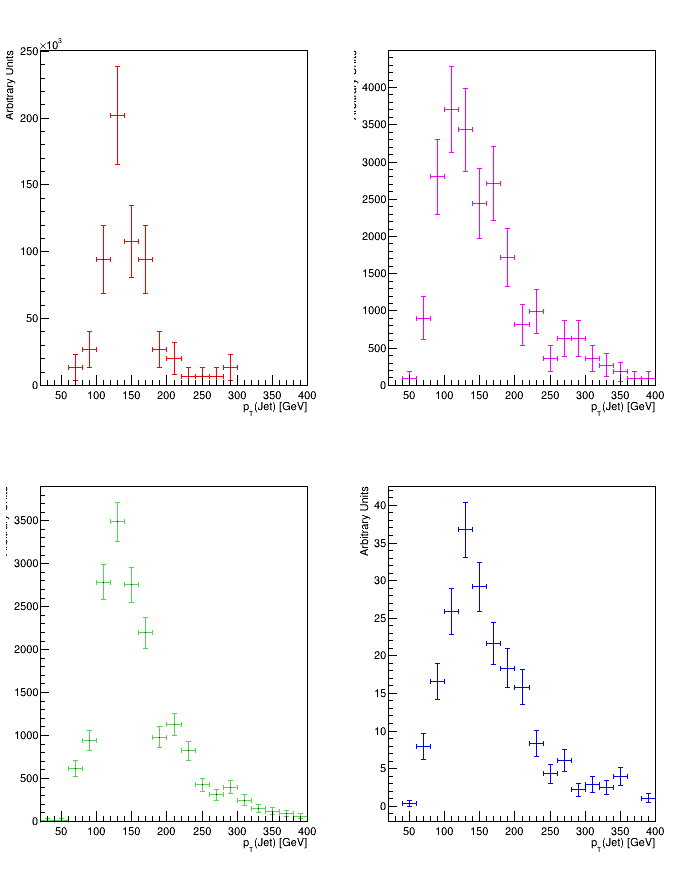

In [31]:
TCanvas *cs = new TCanvas("cs","cs",10,10,700,900);
//TText T; T.SetTextFont(42); T.SetTextAlign(21);
//cs->Clear();
cs->Divide(2,2);
cs->cd(1); BackGround1TH1D->Draw("E1");//Red
cs->cd(2); BackGround2TH1D->Draw("E1 same");//Magenta
cs->cd(3); BackGround3TH1D->Draw("E1 same");//Green
cs->cd(4); SignalTH1D->Draw("E1 same");//Blue
cs->Draw();

In [32]:
auto PlotPathName = PlotPath + "/All_"+ PlotName+".pdf";
auto CodePathName = PlotPath + "/All_" + PlotName + ".C";
if (SaveFiles) {
    cs->SaveAs(PlotPathName.c_str(),"pdf");
    cs->SaveSource(CodePathName.c_str());
    }

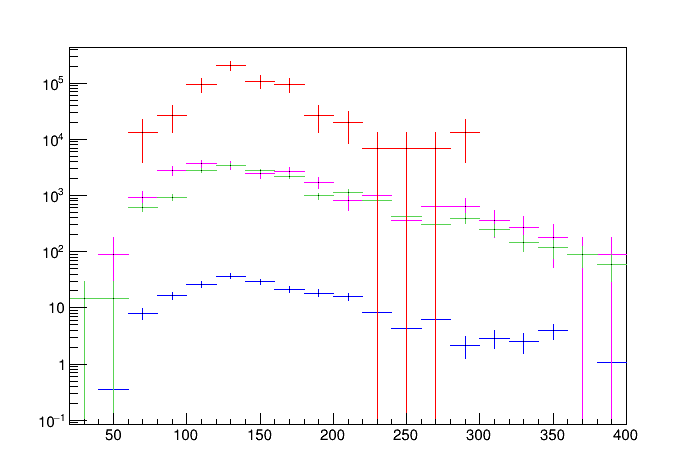

In [33]:
c.Clear();
THStack *hs = new THStack("hs","");
hs->Add(SignalTH1D);
hs->Add(BackGround2TH1D);
hs->Add(BackGround3TH1D);
hs->Add(BackGround1TH1D);
//hs->GetYaxis()->SetTitle("Arbitrary Units");
//hs->GetXaxis()->SetTitle(Var1.second.c_str());
hs->Draw("h nostackb");//nostack
//SignalTH1D->Draw("same");//Blue
c.SetLogy();
c.Draw();

In [34]:
PlotPathName = PlotPath + "/Stack_"+ PlotName+".pdf";
CodePathName = PlotPath + "/Stack_" + PlotName + ".C";
if (SaveFiles) {
    c.SaveAs(PlotPathName.c_str(),"pdf");
    c.SaveSource(CodePathName.c_str());
    }

In [35]:
c.SetLogy(0);

## Significance

### Significance Less Than

In [36]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundPlotter1;
BackgroundPlotter1.push_back(BackGround1TH1D);
BackgroundPlotter1.push_back(BackGround2TH1D);
BackgroundPlotter1.push_back(BackGround3TH1D);

In [37]:
Significance Plotter1_Sig(SignalTH1D,BackgroundPlotter1);
TH1D * Plotter1_SigLT=Plotter1_Sig.GetSigLessThan();

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


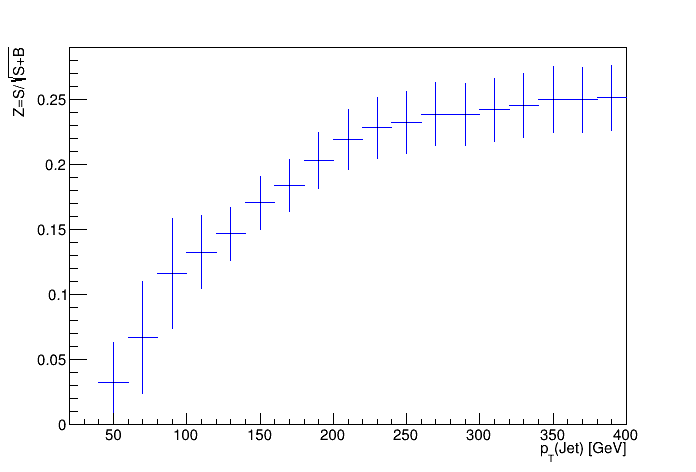

In [38]:
Plotter1_SigLT->Draw("E");
Plotter1_SigLT->SetTitle("");
Plotter1_SigLT->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_SigLT->GetYaxis()->SetTitle("Z=S/#sqrt{S+B}");
c.Draw();

In [39]:
PlotPathName = PlotPath + "/SigLT_" + PlotName + ".pdf";
CodePathName = PlotPath + "/SigLT_" + PlotName + ".C";
if (SaveFiles) {
    c.SaveAs(PlotPathName.c_str(),"pdf");
    c.SaveSource(CodePathName.c_str());
    }

### Significance More Than

In [40]:
auto Plotter1_SigMT=Plotter1_Sig.GetSigMoreThan();

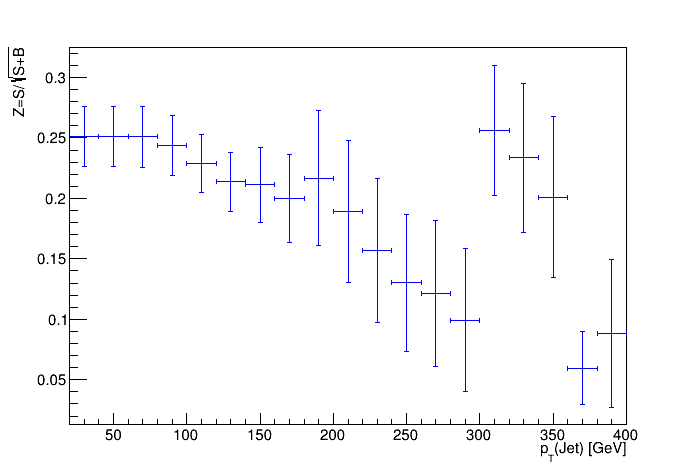

In [41]:
Plotter1_SigMT->Draw("E1");
//Plotter1_SigMT->Draw("text,same");
Plotter1_SigMT->SetTitle("");
Plotter1_SigMT->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_SigMT->GetYaxis()->SetTitle("Z=S/#sqrt{S+B}");
c.Draw();

In [42]:
PlotPathName = PlotPath + "/SigMT_" + PlotName + ".pdf";
CodePathName = PlotPath + "/SigMT_" + PlotName + ".C";
if (SaveFiles) {
    c.SaveAs(PlotPathName.c_str(),"pdf");
    c.SaveSource(CodePathName.c_str());
    }

### General Significance

In [43]:
auto GeneralSigPlotter1 = Plotter1_Sig.GetSignificance();
std::string YaxisTitle = "Cut > " + Var1.second;
std::string XaxisTitle = "Cut < " + Var1.second;

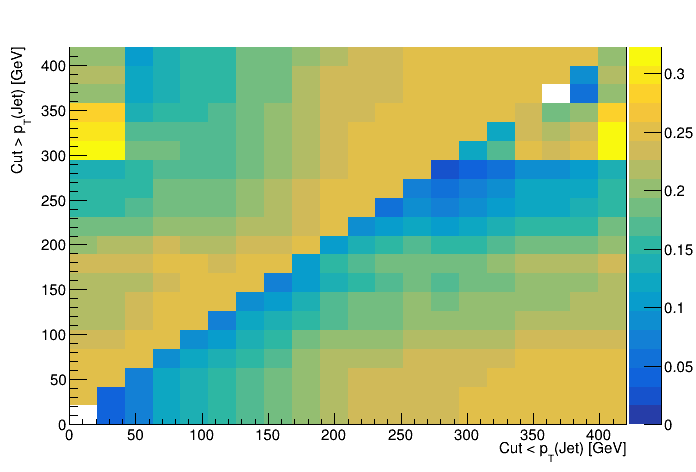

In [44]:
GeneralSigPlotter1->Draw("COLZ1");
//GeneralSigPlotter1->Draw("text, same");
GeneralSigPlotter1->SetTitle("");
GeneralSigPlotter1->GetYaxis()->SetTitle(YaxisTitle.c_str());
GeneralSigPlotter1->GetXaxis()->SetTitle(XaxisTitle.c_str());
//TLatex t(3,10,"#xrightarrow{Less Than Cut}");
//t.Draw();
//gStyle->SetPalette(87);
c.Draw();

In [45]:
PlotPathName = PlotPath + "/SigGeneral_" + PlotName + ".pdf";
CodePathName = PlotPath + "/SigGeneral_" + PlotName + ".C";
if (SaveFiles) {
    c.SaveAs(PlotPathName.c_str(),"pdf");
    c.SaveSource(CodePathName.c_str());
    }

## efficency plots

### Less than efficency

In [46]:
//Get The efficency plots
std::vector<TH1D *> Plotter1_EffLT = Plotter1_Sig.GetEffLessThan();

In [47]:
//Plotter1_EffLT[0]->SetFillStyle(4050);
Plotter1_EffLT[0]->SetFillColor(0);
//Plotter1_EffLT[0]->SetLineColor(1);
Plotter1_EffLT[0]->Draw("E");
Plotter1_EffLT[0]->SetTitle("");
Plotter1_EffLT[0]->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_EffLT[0]->GetYaxis()->SetTitle("Efficiency less-than");
//Plotter1_EffLT[1]->SetFillStyle(4050);
Plotter1_EffLT[1]->SetFillColor(0);
//Plotter1_EffLT[1]->SetLineColor(2);
Plotter1_EffLT[1]->Draw("same E");
//Plotter1_EffLT[2]->SetFillStyle(4050);
Plotter1_EffLT[2]->SetFillColor(0);
//Plotter1_EffLT[2]->SetLineColor(3);
Plotter1_EffLT[2]->Draw("same E");
//Plotter1_EffLT[3]->SetFillStyle(4050);
Plotter1_EffLT[3]->SetFillColor(0);
//Plotter1_EffLT[3]->SetLineColor(4);
Plotter1_EffLT[3]->Draw("same E");
//Plotter1_EffLT[4]->SetFillStyle(4050);
//Plotter1_EffLT[4]->SetFillColor(0);
//Plotter1_EffLT[4]->Draw("same E");


In [48]:
a=Plotter1_EffLT[0]

(TH1D *) @0x7f73fb5d3500


In [49]:
a->GetTitle()

(const char *) ""


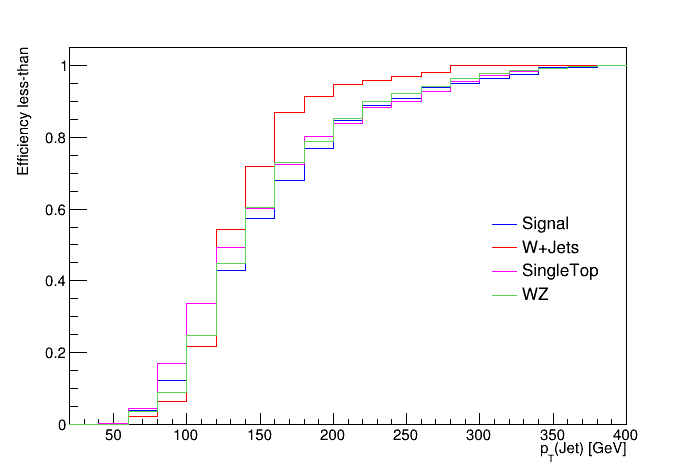

In [50]:
TLegend *legend = new TLegend(0.70,0.35,0.9,0.55);
legend->SetFillStyle(0);
legend->SetBorderSize(0);
legend->SetTextSize(0.039);
legend->SetTextFont(42);
legend->AddEntry(Plotter1_EffLT[0], "Signal","l");
legend->AddEntry(Plotter1_EffLT[1], "W+Jets","l");
legend->AddEntry(Plotter1_EffLT[2], "SingleTop","l");
legend->AddEntry(Plotter1_EffLT[3], "WZ","l");
legend->Draw();
c.Draw();

In [51]:
PlotPathName = PlotPath + "/LTEff_" + PlotName + ".pdf";
CodePathName = PlotPath + "/LTEff_" + PlotName + ".C";
if (SaveFiles) {
    c.SaveAs(PlotPathName.c_str(),"pdf");
    c.SaveSource(CodePathName.c_str());
    }

### Efficiency More Than

In [52]:
//Get The efficency plots
std::vector<TH1D *> Plotter1_EffMT = Plotter1_Sig.GetEffMoreThan();

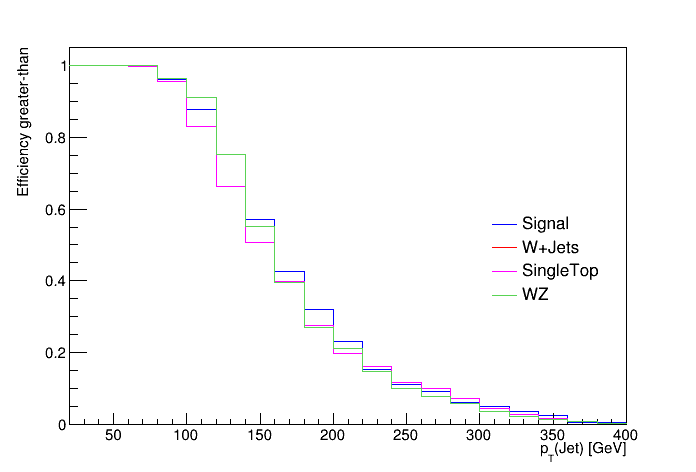

In [53]:
//Plotter1_EffMT[0]->SetFillStyle(4050);
Plotter1_EffMT[0]->SetFillColor(0);
Plotter1_EffMT[0]->Draw("E");
Plotter1_EffMT[0]->SetTitle("");
Plotter1_EffMT[0]->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_EffMT[0]->GetYaxis()->SetTitle("Efficiency greater-than");
//Plotter1_EffMT[1]->SetFillStyle(4050);
Plotter1_EffMT[1]->SetFillColor(0);
//Plotter1_EffMT[1]->Draw("same E");
//Plotter1_EffMT[2]->SetFillStyle(4050);
Plotter1_EffMT[2]->SetFillColor(0);
Plotter1_EffMT[2]->Draw("same E");
//Plotter1_EffMT[3]->SetFillStyle(4050);
Plotter1_EffMT[3]->SetFillColor(0);
Plotter1_EffMT[3]->Draw("same E");
//Plotter1_EffMT[4]->SetFillStyle(4050);
//Plotter1_EffMT[4]->SetFillColor(0);
//Plotter1_EffMT[4]->Draw("same E");
legend->Draw();
c.Draw();

In [54]:
PlotPathName = PlotPath + "/MTEff_" + PlotName + ".pdf";
CodePathName = PlotPath + "/MTEff_" + PlotName + ".C";
if (SaveFiles) {
    c.SaveAs(PlotPathName.c_str(),"pdf");
    c.SaveSource(CodePathName.c_str());
};

In [55]:
//CutFlow

In [56]:
auto MCSignal = chain.GetEntries()*WeightSignal;
auto MCBG1    = chain1.GetEntries()*WeightBG1;
auto MCBG2    = chain2.GetEntries()*WeightBG2;
auto MCBG3    = chain3.GetEntries()*WeightBG3;
auto MCSignalAfterCuts = chain.GetEntries(AllCuts)*WeightSignal;
auto MCBG1AfterCuts    = chain1.GetEntries(AllCuts)*WeightBG1;
auto MCBG2AfterCuts    = chain2.GetEntries(AllCuts)*WeightBG2;
auto MCBG3AfterCuts    = chain3.GetEntries(AllCuts)*WeightBG3;

In [57]:
outfile<<std::endl;
outfile<<"=============================================================================================="<<std::endl;
outfile<<"*                                     EFFICIENCIES                                           *"<<std::endl;
outfile<<"=============================================================================================="<<std::endl;

outfile<<"*   Eff Signal: "<< MCSignalAfterCuts/MCSignal<<std::endl;
outfile<<"*   Eff BG1   : "<< MCBG1AfterCuts/MCBG1<<std::endl;
outfile<<"*   Eff BG2   : "<< MCBG2AfterCuts/MCBG2<<std::endl;
outfile<<"*   Eff BG3   : "<< MCBG3AfterCuts/MCBG3<<std::endl;

outfile<<std::endl;
outfile<<"=============================================================================================="<<std::endl;
outfile<<"*                                     CHAIN ENTRIES                                           *"<<std::endl;
outfile<<"=============================================================================================="<<std::endl;

outfile<<"*   # Signal: "<< MCSignal/WeightSignal<<std::endl;
outfile<<"*   # BG1   : "<< MCBG1/WeightBG1<<std::endl;
outfile<<"*   # BG2   : "<< MCBG2/WeightBG2<<std::endl;
outfile<<"*   # BG3   : "<< MCBG3/WeightBG3<<std::endl;

In [58]:
std::cout<<"=============================================================================================="<<std::endl;
std::cout<<"*                                        FILES                                               *"<<std::endl;
std::cout<<"=============================================================================================="<<std::endl;

std::cout<<"Signal"<<std::endl;

for (int i = 0; i < chain.GetListOfFiles()->GetEntries(); ++i){
    std::cout<<(chain.GetListOfFiles()->At(i))->GetTitle()<<std::endl; 
}

std::cout<<std::endl<<"Background 1"<<std::endl;

for (int i = 0; i < chain1.GetListOfFiles()->GetEntries(); ++i){
    std::cout<<(chain1.GetListOfFiles()->At(i))->GetTitle()<<std::endl; 
}
std::cout<<std::endl<<"Background 2"<<std::endl;

for (int i = 0; i < chain2.GetListOfFiles()->GetEntries(); ++i){
    std::cout<<(chain2.GetListOfFiles()->At(i))->GetTitle()<<std::endl; 
}
std::cout<<std::endl<<"Background 3"<<std::endl;

for (int i = 0; i < chain3.GetListOfFiles()->GetEntries(); ++i){
    std::cout<<(chain3.GetListOfFiles()->At(i))->GetTitle()<<std::endl; 
}
std::cout<<std::endl;
std::cout<<"=============================================================================================="<<std::endl;
std::cout<<"*                                     EFFICIENCIES                                           *"<<std::endl;
std::cout<<"=============================================================================================="<<std::endl;

std::cout<<"*   Eff Signal: "<< MCSignalAfterCuts/MCSignal<<std::endl;
std::cout<<"*   Eff BG1   : "<< MCBG1AfterCuts/MCBG1<<std::endl;
std::cout<<"*   Eff BG2   : "<< MCBG2AfterCuts/MCBG2<<std::endl;
std::cout<<"*   Eff BG3   : "<< MCBG3AfterCuts/MCBG3<<std::endl;

std::cout<<std::endl;
std::cout<<"=============================================================================================="<<std::endl;
std::cout<<"*                                     CHAIN ENTRIES                                           *"<<std::endl;
std::cout<<"=============================================================================================="<<std::endl;

std::cout<<"*   # Signal: "<< MCSignal/MCSignal<<std::endl;
std::cout<<"*   # BG1   : "<< MCBG1/WeightBG1<<std::endl;
std::cout<<"*   # BG2   : "<< MCBG2/WeightBG2<<std::endl;
std::cout<<"*   # BG3   : "<< MCBG3/WeightBG3<<std::endl;

*                                        FILES                                               *
Signal
/home/camilo/cms/MC_VLF-Originales/Signal_BR_Muon25_Tau75_BRFixed/Masses_145_135_Brs_2575_FixedBRs_delphes_events.root

Background 1
/home/camilo/cms/Scripts_MadGraph_VLFTEO/Datos/WJets/BackGround-mumuW_With0Jets/Events/run_02/tag_1_delphes_events.root
/home/camilo/cms/Scripts_MadGraph_VLFTEO/Datos/WJets/BackGround-mumuW_With0Jets/Events/run_01/tag_1_delphes_events.root

Background 2
/home/camilo/cms/MC_VLF-Originales/SingleTop/tag_1_delphes_events1.root
/home/camilo/cms/MC_VLF-Originales/SingleTop/tag_1_delphes_events3.root
/home/camilo/cms/MC_VLF-Originales/SingleTop/tag_1_delphes_events4.root
/home/camilo/cms/MC_VLF-Originales/SingleTop/tag_1_delphes_events5.root
/home/camilo/cms/MC_VLF-Originales/SingleTop/tag_1_delphes_events6.root

Background 3
/home/camilo/cms/MC_VLF-Originales/WZ/tag_1_delphes_events1.root
/home/camilo/cms/MC_VLF-Originales/WZ/tag_1_delphes_events10.root
/home/

In [59]:
/*Close the file*/
outfile.close();

### Jet.Size<4
*   Eff Signal: 0.0139576
*   Eff BG1   : 0.00215079
*   Eff BG2   : 0.00175859
*   Eff BG3   : 0.0112609

### Jet.Size<3
*   Eff Signal: 0.0102473
*   Eff BG1   : 0.00183216
*   Eff BG2   : 0.000777415
*   Eff BG3   : 0.0078775